In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
dados = pd.read_csv('/content/precos-glp-06.csv', sep=';')

In [29]:
dados.shape

(18131, 16)

In [30]:
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,RS,PORTO ALEGRE,COMPANHIA ULTRAGAZ S A,61.602.199/0065-87,AVENIDA CAIRU,989,NaN,NAVEGANTES,90230-031,GLP,02/06/2022,110,NaN,R$ / 13 kg,ULTRAGAZ
1,SE,RJ,NOVA IGUACU,NACIONAL GAS BUTANO DISTRIBUIDORA LTDA,06.980.064/0027-11,ESTRADA DR. PLÍNIO CASADO,2227,NaN,PRATA,26220-422,GLP,01/06/2022,97,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GLP,01/06/2022,132,NaN,R$ / 13 kg,AMAZONGÁS
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,01/06/2022,132,NaN,R$ / 13 kg,AMAZONGÁS
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GLP,01/06/2022,132,NaN,R$ / 13 kg,AMAZONGÁS


In [31]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18131 entries, 0 to 18130
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     18131 non-null  object 
 1   Estado - Sigla     18131 non-null  object 
 2   Municipio          18131 non-null  object 
 3   Revenda            18131 non-null  object 
 4   CNPJ da Revenda    18131 non-null  object 
 5   Nome da Rua        18131 non-null  object 
 6   Numero Rua         18130 non-null  object 
 7   Complemento        4265 non-null   object 
 8   Bairro             18127 non-null  object 
 9   Cep                18131 non-null  object 
 10  Produto            18131 non-null  object 
 11  Data da Coleta     18131 non-null  object 
 12  Valor de Venda     18131 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  18131 non-null  object 
 15  Bandeira           18131 non-null  object 
dtypes: float64(1), object(

In [32]:
dados.describe()

,Valor de Compra
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [33]:
#deu essa resposta porque apenas a coluna "valor de compra" foi entendida como numérica

In [34]:
dados['Valor de Venda'] = pd.to_numeric(dados['Valor de Venda'].apply(lambda linha: linha.replace(',', '.')))

In [39]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18131 entries, 0 to 18130
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     18131 non-null  object 
 1   Estado - Sigla     18131 non-null  object 
 2   Municipio          18131 non-null  object 
 3   Revenda            18131 non-null  object 
 4   CNPJ da Revenda    18131 non-null  object 
 5   Nome da Rua        18131 non-null  object 
 6   Numero Rua         18130 non-null  object 
 7   Complemento        4265 non-null   object 
 8   Bairro             18127 non-null  object 
 9   Cep                18131 non-null  object 
 10  Produto            18131 non-null  object 
 11  Data da Coleta     18131 non-null  object 
 12  Valor de Venda     18131 non-null  float64
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  18131 non-null  object 
 15  Bandeira           18131 non-null  object 
dtypes: float64(2), object(

In [36]:
estado_ms = dados.loc[dados['Estado - Sigla'] == 'MS']
estado_ms

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
154,CO,MS,PONTA PORA,CRESPO & PALADINI GAS E TRANSPORTES LTDA,02.965.310/0001-76,RUA ANTONIO JOAO,1268,NaN,CENTRO,79904-594,GLP,02/06/2022,108.00,NaN,R$ / 13 kg,ULTRAGAZ
156,CO,MS,CORUMBA,FARID A. H. M. MUSTAFÁ EPP,02.984.590/0001-60,RUA CAMPO GRANDE,S/N,LOTE 69,N. SRA. DE FATIMA,79320-080,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
236,CO,MS,CAMPO GRANDE,A.S. FERREIRA - ME,33.107.319/0001-70,RUA ANACA,517,NaN,VILA MORENINHA,79065-070,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,BRANCA
240,CO,MS,CORUMBA,PANTANEIRA REVENDEDORA. DE GÁS E TRANSPORTE LT...,36.788.156/0001-26,RUA PORTO CARRERO,1939,NaN,AEROPORTO,79332-090,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
328,CO,MS,PONTA PORA,UNIGAS COMERCIO DE COMBUSTIVEIS LTDA,03.537.946/0002-60,AVENIDA BRASIL,3549,NaN,CENTRO,79900-000,GLP,02/06/2022,106.00,NaN,R$ / 13 kg,COPAGAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17945,CO,MS,DOURADOS,JESSICA VARGAS MORALES,23.858.594/0001-71,RUA ALVARO BRANDAO,1670,NaN,VILA SAO FRANCISCO,79833-260,GLP,27/06/2022,120.00,NaN,R$ / 13 kg,COPAGAZ
17948,CO,MS,DOURADOS,AUTO POSTO ANIELLI LTDA,03.084.756/0001-54,AVENIDA MARCELINO PIRES,7250,NaN,JARDIM MARCIA,79841-000,GLP,27/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
18012,CO,MS,CAMPO GRANDE,SUPERMERCADO GAUCHAO LTDA,35.831.943/0001-40,RUA PADRE MUSA TUMA,1121,NaN,JARDIM ITAMARACA,79062-130,GLP,29/06/2022,114.99,NaN,R$ / 13 kg,BRANCA
18027,CO,MS,CAMPO GRANDE,JULIANO ARAUJO PEREIRA EIRELI,36.160.092/0001-14,RUA ENGENHEIRO PAULO FRONTIN,501,NaN,JARDIM LOS ANGELES,79073-235,GLP,30/06/2022,110.00,NaN,R$ / 13 kg,BRANCA


In [37]:
estado_ms['Valor de Venda'].nunique()

28

In [42]:
#valor de vendas mais caro do ms
maiscaroms = estado_ms.sort_values(['Valor de Venda'], ascending=False).head(20)
maiscaroms

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
5577,CO,MS,DOURADOS,W.A. TANIZAKI,31.531.568/0001-62,RUA BALBINA DE MATOS,1715,NaN,JARDIM CLIMAX,79820-090,GLP,06/06/2022,130.0,NaN,R$ / 13 kg,COPAGAZ
1172,CO,MS,COXIM,COMERCIAL V C GAS LTDA - ME,18.531.807/0001-16,RUA BELA DONA,368,NaN,VILA BELA,79400-000,GLP,01/06/2022,130.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
8627,CO,MS,COXIM,COMERCIAL V C GAS LTDA - ME,18.531.807/0001-16,RUA BELA DONA,368,NaN,VILA BELA,79400-000,GLP,13/06/2022,130.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
2706,CO,MS,COXIM,OZELIA FERREIRA ME,06.143.203/0001-13,AVENIDA JOÃO FELICIANO BEZERRA,330,"LOTE 03, QUADRA 78",SR. DIVINO,79400-000,GLP,06/06/2022,130.0,NaN,R$ / 13 kg,ULTRAGAZ
2732,CO,MS,COXIM,P. A. DA SILVA - ME,06.163.621/0001-72,RUA PEDRO ARAGÃO DE SOUZA,297,NaN,SENHOR DIVINO,79400-000,GLP,07/06/2022,130.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
12752,CO,MS,COXIM,COMERCIAL V C GAS LTDA - ME,18.531.807/0001-16,RUA BELA DONA,368,NaN,VILA BELA,79400-000,GLP,20/06/2022,130.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
9298,CO,MS,DOURADOS,DAIANE LAZZARETTI SOUZA,06.272.573/0002-31,AVENIDA MARCELINO PIRES,273,NaN,JARDIM CLIMAX,79820-010,GLP,13/06/2022,130.0,NaN,R$ / 13 kg,ULTRAGAZ
16144,CO,MS,DOURADOS,DAIANE LAZZARETTI SOUZA,06.272.573/0001-50,RUA MONTE ALEGRE,3515,NaN,JARDIM PAULISTA,79830-070,GLP,27/06/2022,130.0,NaN,R$ / 13 kg,ULTRAGAZ
12078,CO,MS,DOURADOS,DAIANE LAZZARETTI SOUZA,06.272.573/0001-50,RUA MONTE ALEGRE,3515,NaN,JARDIM PAULISTA,79830-070,GLP,20/06/2022,130.0,NaN,R$ / 13 kg,ULTRAGAZ
6793,CO,MS,COXIM,P. A. DA SILVA - ME,06.163.621/0001-72,RUA PEDRO ARAGÃO DE SOUZA,297,NaN,SENHOR DIVINO,79400-000,GLP,13/06/2022,130.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA


In [50]:
maiscaroms['Municipio'].nunique()

2

In [52]:
maiscaroms['Municipio'].unique()

array(['DOURADOS', 'COXIM'], dtype=object)

In [54]:
maiscaroms['Municipio'].value_counts()

COXIM       12
DOURADOS     8
Name: Municipio, dtype: int64

In [57]:
estado_ms['Municipio'].value_counts()

CAMPO GRANDE      245
DOURADOS          115
NOVA ANDRADINA     44
TRES LAGOAS        32
COXIM              26
PONTA PORA          9
CORUMBA             9
Name: Municipio, dtype: int64

In [59]:
campao = estado_ms.loc[estado_ms['Municipio'] == 'CAMPO GRANDE']
campao

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
236,CO,MS,CAMPO GRANDE,A.S. FERREIRA - ME,33.107.319/0001-70,RUA ANACA,517,NaN,VILA MORENINHA,79065-070,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,BRANCA
338,CO,MS,CAMPO GRANDE,A.S. FERREIRA - ME,33.107.319/0002-50,AVENIDA BAOBA,317,NaN,MORENINHA IV,79065-380,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,BRANCA
351,CO,MS,CAMPO GRANDE,VALDECIR DIAS PAGANOTTI,05.829.987/0001-75,RUA BARUERI,809,NaN,MORENINHA I,79065-201,GLP,01/06/2022,110.00,NaN,R$ / 13 kg,BRANCA
394,CO,MS,CAMPO GRANDE,SILVANO ALVES FERREIRA,06.215.486/0001-61,RUA PHILADELFO ALVES DA SILVA,152,NaN,JARDIM COLIBRI II,79071-110,GLP,01/06/2022,110.00,NaN,R$ / 13 kg,BRANCA
717,CO,MS,CAMPO GRANDE,ERASMO TAVARES DA SILVA - ME.,10.974.062/0001-58,RUA FILOMENA SEGUNDO NASCIMENTO,1422,NaN,UNIVERSITARIO,79063-090,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17809,CO,MS,CAMPO GRANDE,ANA MARIA MOREL INSARRALDE,27.228.144/0001-56,AVENIDA MARECHAL DEODORO,6030,NaN,COOPHAVILA II,79097-000,GLP,30/06/2022,110.00,NaN,R$ / 13 kg,COPAGAZ
17872,CO,MS,CAMPO GRANDE,ILZA DE OLIVEIRA MENDES,34.164.208/0001-68,RUA WALDEMAR WRITH,769,NaN,JARDIM MONUMENTO,79071-210,GLP,30/06/2022,105.00,NaN,R$ / 13 kg,BRANCA
18012,CO,MS,CAMPO GRANDE,SUPERMERCADO GAUCHAO LTDA,35.831.943/0001-40,RUA PADRE MUSA TUMA,1121,NaN,JARDIM ITAMARACA,79062-130,GLP,29/06/2022,114.99,NaN,R$ / 13 kg,BRANCA
18027,CO,MS,CAMPO GRANDE,JULIANO ARAUJO PEREIRA EIRELI,36.160.092/0001-14,RUA ENGENHEIRO PAULO FRONTIN,501,NaN,JARDIM LOS ANGELES,79073-235,GLP,30/06/2022,110.00,NaN,R$ / 13 kg,BRANCA


In [62]:
campao.sort_values(['Valor de Venda'], ascending=False)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
1850,CO,MS,CAMPO GRANDE,RIBEIRO DE MENDONCA BASTON & CIA LTDA,16.045.015/0001-06,AVENIDA AFONSO PENA,5264,NaN,CHACARA CACHOEIRA,79040-010,GLP,09/06/2022,125.0,NaN,R$ / 13 kg,COPAGAZ
14106,CO,MS,CAMPO GRANDE,RIBEIRO DE MENDONCA BASTON & CIA LTDA,16.045.015/0001-06,AVENIDA AFONSO PENA,5264,NaN,CHACARA CACHOEIRA,79040-010,GLP,29/06/2022,125.0,NaN,R$ / 13 kg,COPAGAZ
2118,CO,MS,CAMPO GRANDE,PAI & FILHO COMÉRCIO DE GÁS LTDA. - EPP,02.154.625/0001-33,RUA PEDRO CELESTINO,550,NaN,VILA SOL NASCENTE,79004-560,GLP,09/06/2022,122.0,NaN,R$ / 13 kg,COPAGAZ
16160,CO,MS,CAMPO GRANDE,PAULO CEZAR BATISTA GAS,13.517.498/0001-06,RUA MARQUES DE BARBACENA,51,NaN,JARDIM LOS ANGELES,79073-253,GLP,30/06/2022,115.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
15821,CO,MS,CAMPO GRANDE,ELIAS ALVES DA SILVA - ME,11.236.938/0001-21,RUA PATROCINIO,882,NaN,LOTEAMENTO BRANDÃO MUNICIPAL,79073-030,GLP,30/06/2022,115.0,NaN,R$ / 13 kg,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8340,CO,MS,CAMPO GRANDE,AUTO POSTO SHIRAISHI CENTRO LTDA,20.112.808/0001-78,RUA DOM AQUINO,1721,NaN,CENTRO,79002-184,GLP,15/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA
10016,CO,MS,CAMPO GRANDE,AUTO POSTO NORTE SUL LTDA,24.668.469/0001-61,AVENIDA MANOEL DA COSTA LIMA,2590,NaN,GUANANDI,79086-110,GLP,21/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA
12464,CO,MS,CAMPO GRANDE,AUTO POSTO SHIRAISHI CENTRO LTDA,20.112.808/0001-78,RUA DOM AQUINO,1721,NaN,CENTRO,79002-184,GLP,21/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA
5914,CO,MS,CAMPO GRANDE,AUTO POSTO NORTE SUL LTDA,24.668.469/0001-61,AVENIDA MANOEL DA COSTA LIMA,2590,NaN,GUANANDI,79086-110,GLP,15/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA


In [63]:
#organizado a tabela acima, nota-se que os locais que o valor mais alto, se encontram em faixa nobre da cidade, o terceiro em área central e o quinto, tbem é área de maior poder aquisitivo
#no entanto, los angeles é mais periferico.
#Ja a parte "tail", nota-se a possibilidade de dados duplicados, assim como tbem ocorreu com o valor mais alto.

In [64]:
campao['Bairro'].value_counts()

TIRADENTES            11
JARDIM ITAMARACA      11
JARDIM LOS ANGELES    10
JARDIM MONUMENTO      10
VILA CARLOTA           9
                      ..
VILA NOVA CAPITAL      1
VILA CIDADE MORENA     1
JARDIM DO CORREGO      1
CIDADE MORENA          1
JARDIM PACAEMBU        1
Name: Bairro, Length: 68, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


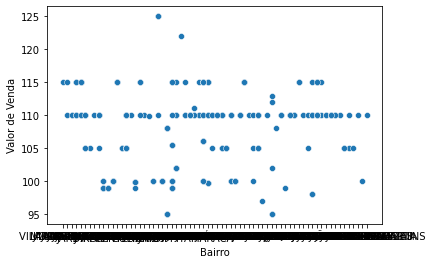

In [74]:
sns.scatterplot(campao['Bairro'], campao['Valor de Venda'])

In [75]:
campao.describe()

,Valor de Venda,Valor de Compra
count,245.000000,0.0
mean,107.691102,NaN
std,5.747388,NaN
min,95.000000,NaN
25%,105.000000,NaN
50%,110.000000,NaN
75%,110.000000,NaN
max,125.000000,NaN


In [82]:
campao_sort = campao.sort_values('Valor de Venda', ascending=False)
campao_sort

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
1850,CO,MS,CAMPO GRANDE,RIBEIRO DE MENDONCA BASTON & CIA LTDA,16.045.015/0001-06,AVENIDA AFONSO PENA,5264,NaN,CHACARA CACHOEIRA,79040-010,GLP,09/06/2022,125.0,NaN,R$ / 13 kg,COPAGAZ
14106,CO,MS,CAMPO GRANDE,RIBEIRO DE MENDONCA BASTON & CIA LTDA,16.045.015/0001-06,AVENIDA AFONSO PENA,5264,NaN,CHACARA CACHOEIRA,79040-010,GLP,29/06/2022,125.0,NaN,R$ / 13 kg,COPAGAZ
2118,CO,MS,CAMPO GRANDE,PAI & FILHO COMÉRCIO DE GÁS LTDA. - EPP,02.154.625/0001-33,RUA PEDRO CELESTINO,550,NaN,VILA SOL NASCENTE,79004-560,GLP,09/06/2022,122.0,NaN,R$ / 13 kg,COPAGAZ
16160,CO,MS,CAMPO GRANDE,PAULO CEZAR BATISTA GAS,13.517.498/0001-06,RUA MARQUES DE BARBACENA,51,NaN,JARDIM LOS ANGELES,79073-253,GLP,30/06/2022,115.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
15821,CO,MS,CAMPO GRANDE,ELIAS ALVES DA SILVA - ME,11.236.938/0001-21,RUA PATROCINIO,882,NaN,LOTEAMENTO BRANDÃO MUNICIPAL,79073-030,GLP,30/06/2022,115.0,NaN,R$ / 13 kg,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8340,CO,MS,CAMPO GRANDE,AUTO POSTO SHIRAISHI CENTRO LTDA,20.112.808/0001-78,RUA DOM AQUINO,1721,NaN,CENTRO,79002-184,GLP,15/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA
10016,CO,MS,CAMPO GRANDE,AUTO POSTO NORTE SUL LTDA,24.668.469/0001-61,AVENIDA MANOEL DA COSTA LIMA,2590,NaN,GUANANDI,79086-110,GLP,21/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA
12464,CO,MS,CAMPO GRANDE,AUTO POSTO SHIRAISHI CENTRO LTDA,20.112.808/0001-78,RUA DOM AQUINO,1721,NaN,CENTRO,79002-184,GLP,21/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA
5914,CO,MS,CAMPO GRANDE,AUTO POSTO NORTE SUL LTDA,24.668.469/0001-61,AVENIDA MANOEL DA COSTA LIMA,2590,NaN,GUANANDI,79086-110,GLP,15/06/2022,95.0,NaN,R$ / 13 kg,NGC DISTRIBUIDORA


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


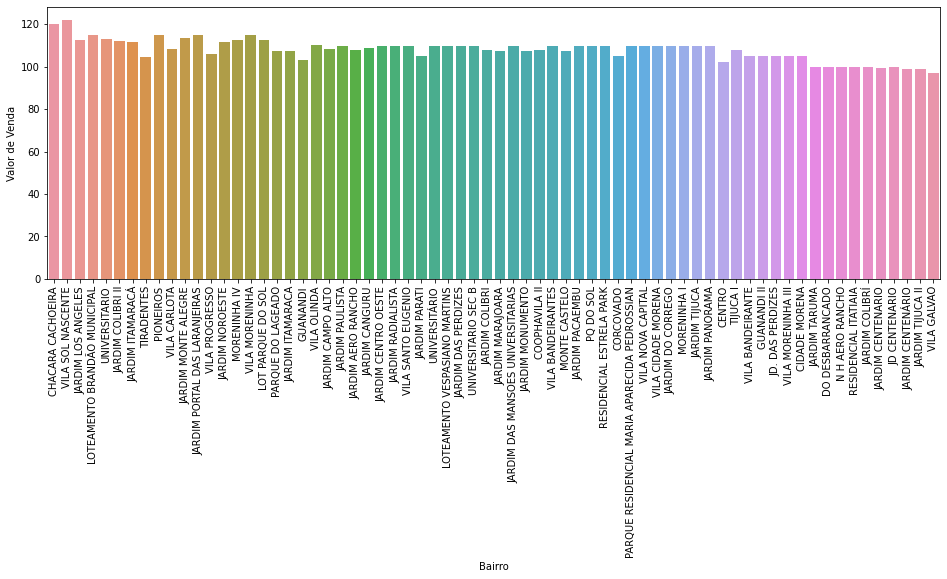

In [83]:
plt.figure(figsize=(16,5))
sns.barplot(campao_sort['Bairro'], campao_sort['Valor de Venda'], ci=None)
plt.xticks(rotation=90)
plt.show()

In [66]:
campao.loc[campao['Bairro'] == 'TIRADENTES'].sort_values('Valor de Venda', ascending=False)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
5291,CO,MS,CAMPO GRANDE,ABREGOS E ALVES LTDA,26.145.992/0001-39,RUA MARIA DO CARMO FERRO,49,NaN,TIRADENTES,79041-141,GLP,09/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
13494,CO,MS,CAMPO GRANDE,ABREGOS E ALVES LTDA,26.145.992/0001-39,RUA MARIA DO CARMO FERRO,49,NaN,TIRADENTES,79041-141,GLP,22/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
17543,CO,MS,CAMPO GRANDE,ABREGOS E ALVES LTDA,26.145.992/0001-39,RUA MARIA DO CARMO FERRO,49,NaN,TIRADENTES,79041-141,GLP,29/06/2022,110.00,NaN,R$ / 13 kg,COPAGAZ
1855,CO,MS,CAMPO GRANDE,POSTO ROUXINOL LTDA,00.413.865/0001-80,AVENIDA ROUXINOL,35,NaN,TIRADENTES,79041-150,GLP,09/06/2022,105.50,NaN,R$ / 13 kg,COPAGAZ
14111,CO,MS,CAMPO GRANDE,POSTO ROUXINOL LTDA,00.413.865/0001-80,AVENIDA ROUXINOL,35,NaN,TIRADENTES,79041-150,GLP,29/06/2022,105.50,NaN,R$ / 13 kg,COPAGAZ
1853,CO,MS,CAMPO GRANDE,AUTO POSTO MALIBU LTDA,02.110.486/0001-46,RUA JOSE NOGUEIRA VIEIRA,1310,NaN,TIRADENTES,79042-010,GLP,09/06/2022,99.99,NaN,R$ / 13 kg,LIQUIGÁS
10019,CO,MS,CAMPO GRANDE,AUTO POSTO MALIBU LTDA,02.110.486/0001-46,RUA JOSE NOGUEIRA VIEIRA,1310,NaN,TIRADENTES,79042-010,GLP,22/06/2022,99.99,NaN,R$ / 13 kg,LIQUIGÁS
14109,CO,MS,CAMPO GRANDE,AUTO POSTO MALIBU LTDA,02.110.486/0001-46,RUA JOSE NOGUEIRA VIEIRA,1310,NaN,TIRADENTES,79042-010,GLP,29/06/2022,99.99,NaN,R$ / 13 kg,LIQUIGÁS
3869,CO,MS,CAMPO GRANDE,L.H. FENNER - COMBUSTIVEIS,08.221.402/0001-28,AVENIDA TRES BARRAS,2321,NaN,TIRADENTES,79062-510,GLP,09/06/2022,99.00,NaN,R$ / 13 kg,COPAGAZ
12041,CO,MS,CAMPO GRANDE,L.H. FENNER - COMBUSTIVEIS,08.221.402/0001-28,AVENIDA TRES BARRAS,2321,NaN,TIRADENTES,79062-510,GLP,22/06/2022,99.00,NaN,R$ / 13 kg,COPAGAZ


In [67]:
#pelo visto existem mais de uma opcao por local de venda

In [70]:
campao['Bairro'].unique()

array(['VILA MORENINHA', 'MORENINHA IV', 'MORENINHA I',
       'JARDIM COLIBRI II', 'UNIVERSITARIO', 'JARDIM COLIBRI',
       'CIDADE MORENA', 'JARDIM DO CORREGO', 'JARDIM CANGURU',
       'JARDIM CENTENARIO', 'JARDIM CENTENÁRIO', 'JARDIM COLIBRÍ',
       'PIONEIROS', 'VILA MORENINHA III', 'JARDIM MONUMENTO',
       'VILA CIDADE MORENA', 'JD CENTENARIO', 'JARDIM MONTE ALEGRE',
       'VILA NOVA CAPITAL', 'JARDIM PANORAMA', 'DO DESBARRANCADO',
       'CHACARA CACHOEIRA', 'JARDIM TARUMA', 'CENTRO', 'TIRADENTES',
       'VILA PROGRESSO', 'VILA SOL NASCENTE', 'JARDIM ITAMARACÁ',
       'UNIVERSITÁRIO', 'VILA OLINDA', 'JARDIM NOROESTE',
       'JARDIM ITAMARACA', 'VILA CARLOTA', 'JARDIM CAMPO ALTO',
       'JARDIM PAULISTA', 'JARDIM AERO RANCHO', 'GUANANDI II',
       'JARDIM PARATI', 'N H AERO RANCHO',
       'JARDIM DAS MANSOES UNIVERSITARIAS',
       'JARDIM PORTAL DAS LARANJEIRAS',
       'PARQUE RESIDENCIAL MARIA APARECIDA PEDROSSIAN', 'CORCOVADO',
       'COOPHAVILA II', 'VILA GALVAO'

In [71]:
campao.loc[campao['Bairro'] == 'PARQUE RESIDENCIAL MARIA APARECIDA PEDROSSIAN']

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
4330,CO,MS,CAMPO GRANDE,AUTO POSTO PREMIUM LTDA,19.972.451/0001-19,RUA MANOEL DE OLIVEIRA GOMES,41,NaN,PARQUE RESIDENCIAL MARIA APARECIDA PEDROSSIAN,79002-970,GLP,09/06/2022,110.0,NaN,R$ / 13 kg,BRANCA


In [72]:
dados

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,RS,PORTO ALEGRE,COMPANHIA ULTRAGAZ S A,61.602.199/0065-87,AVENIDA CAIRU,989,NaN,NAVEGANTES,90230-031,GLP,02/06/2022,110.0,NaN,R$ / 13 kg,ULTRAGAZ
1,SE,RJ,NOVA IGUACU,NACIONAL GAS BUTANO DISTRIBUIDORA LTDA,06.980.064/0027-11,ESTRADA DR. PLÍNIO CASADO,2227,NaN,PRATA,26220-422,GLP,01/06/2022,97.0,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GLP,01/06/2022,132.0,NaN,R$ / 13 kg,AMAZONGÁS
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,01/06/2022,132.0,NaN,R$ / 13 kg,AMAZONGÁS
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GLP,01/06/2022,132.0,NaN,R$ / 13 kg,AMAZONGÁS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18126,N,PA,CONCEICAO DO ARAGUAIA,N. DA S. BRITO EIRELI,22.019.599/0001-48,RUA DEZ,140,SALA A,TANCREDO NEVES,68540-000,GLP,29/06/2022,135.0,NaN,R$ / 13 kg,NACIONAL GÁS BUTANO
18127,S,PR,CORNELIO PROCOPIO,JULIO CEZAR DIAS DA LUZ,35.788.990/0001-59,RUA OTHON DI TOMMASO BASTOS,3,NaN,JARDIM ALVORADA,86300-000,GLP,28/06/2022,125.0,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
18128,SE,MG,FORMIGA,MELLO & BASILIO COMERCIO LTDA,37.621.456/0001-89,AVENIDA OLIMPIO AVELAR,104,NaN,VILA IRBA,35570-530,GLP,29/06/2022,120.0,NaN,R$ / 13 kg,ULTRAGAZ
18129,SE,SP,UBATUBA,WESLEY BEZERRA SANTIAGO,37.539.226/0001-75,RUA BANGU,70,NaN,ESTUFA II,11680-000,GLP,29/06/2022,110.0,NaN,R$ / 13 kg,FOGAS


In [73]:
dados.describe()

,Valor de Venda,Valor de Compra
count,18131.000000,0.0
mean,113.542127,NaN
std,10.308625,NaN
min,72.000000,NaN
25%,106.000000,NaN
50%,113.000000,NaN
75%,120.000000,NaN
max,160.000000,NaN


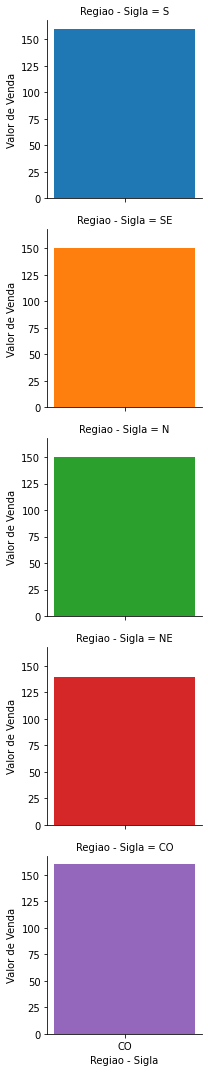

In [91]:
#cor do fundo
cor_fundo = '#f5f5f5'

#criando sistema de grid
grid_graficos = sns.FacetGrid(dados, col='Regiao - Sigla', hue='Regiao - Sigla', col_wrap=1)

##procedimento para escolher o tipo de gráfico
grid_graficos = grid_graficos.map(plt.bar, 'Regiao - Sigla', 'Valor de Venda')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


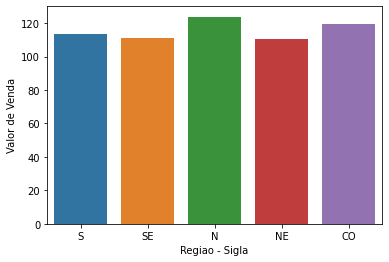

In [90]:
sns.barplot(dados['Regiao - Sigla'], dados['Valor de Venda'], ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


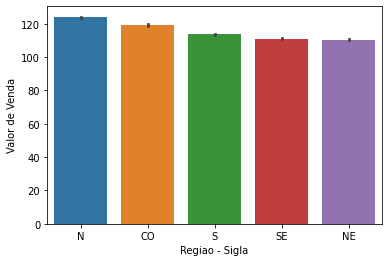

In [115]:
sns.barplot(dados['Regiao - Sigla'], dados['Valor de Venda'], order=['N', 'CO', 'S', 'SE', 'NE']) #CONSEGUI FAZER, MAS TIVE QUE ESCREVER NA MAO

In [112]:
teste1 = dados.groupby(by=['Regiao - Sigla']).median()['Valor de Venda'].reset_index().sort_values('Valor de Venda',ascending=False)
teste1

,Regiao - Sigla,Valor de Venda
1,N,125.0
0,CO,118.0
3,S,112.9
2,NE,110.0
4,SE,110.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


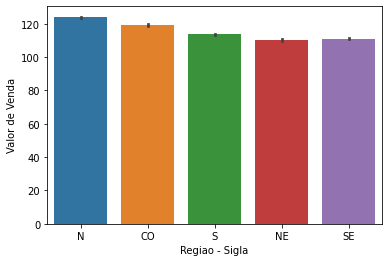

In [117]:
sns.barplot(dados['Regiao - Sigla'], dados['Valor de Venda'], order=teste1['Regiao - Sigla']) #dessa forma, acabei automatizando.

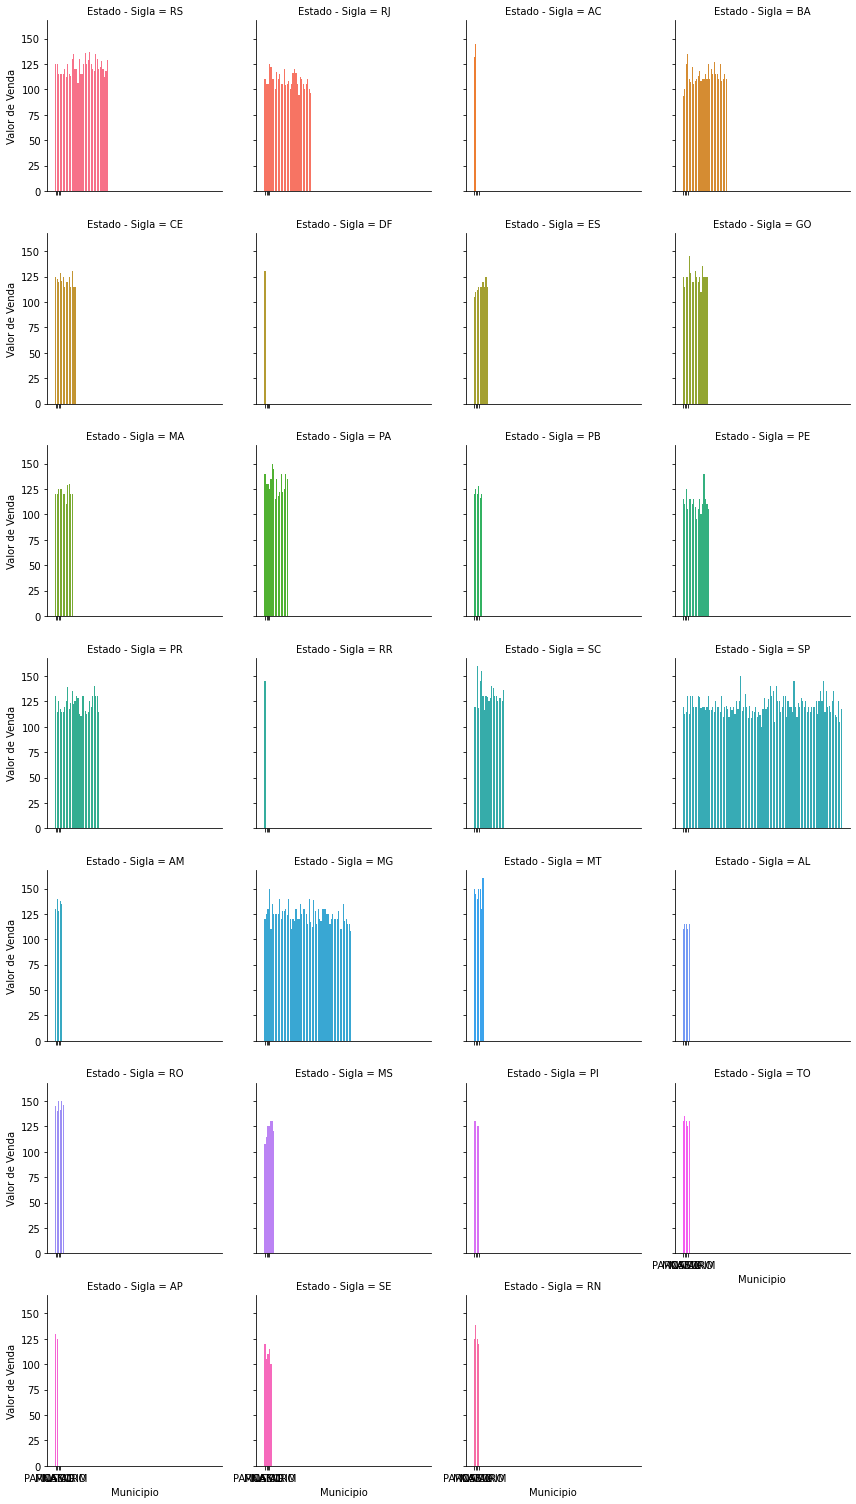

In [121]:
#cor de fundo
fundo = '#f5f5f5'

#sistema de grid
grafico_geral = sns.FacetGrid(dados, col='Estado - Sigla', hue='Estado - Sigla', col_wrap=4)

#adicionado o tipo de gráfico
grafico_geral = grafico_geral.map(plt.bar, 'Municipio', 'Valor de Venda')

In [126]:
dados['Municipio'].nunique()

462

In [124]:
dadosagrupados = dados.groupby(by=['Estado - Sigla', 'Municipio']).mean()['Valor de Venda'].reset_index()
dadosagrupados

,Estado - Sigla,Municipio,Valor de Venda
0,AC,CRUZEIRO DO SUL,132.000000
1,AC,RIO BRANCO,130.357615
2,AL,ARAPIRACA,105.299545
3,AL,DELMIRO GOUVEIA,110.000000
4,AL,MACEIO,105.704545
...,...,...,...
458,TO,ARAGUAINA,125.357143
459,TO,GURUPI,123.916364
460,TO,PALMAS,121.788136
461,TO,PARAISO DO TOCANTINS,125.882353


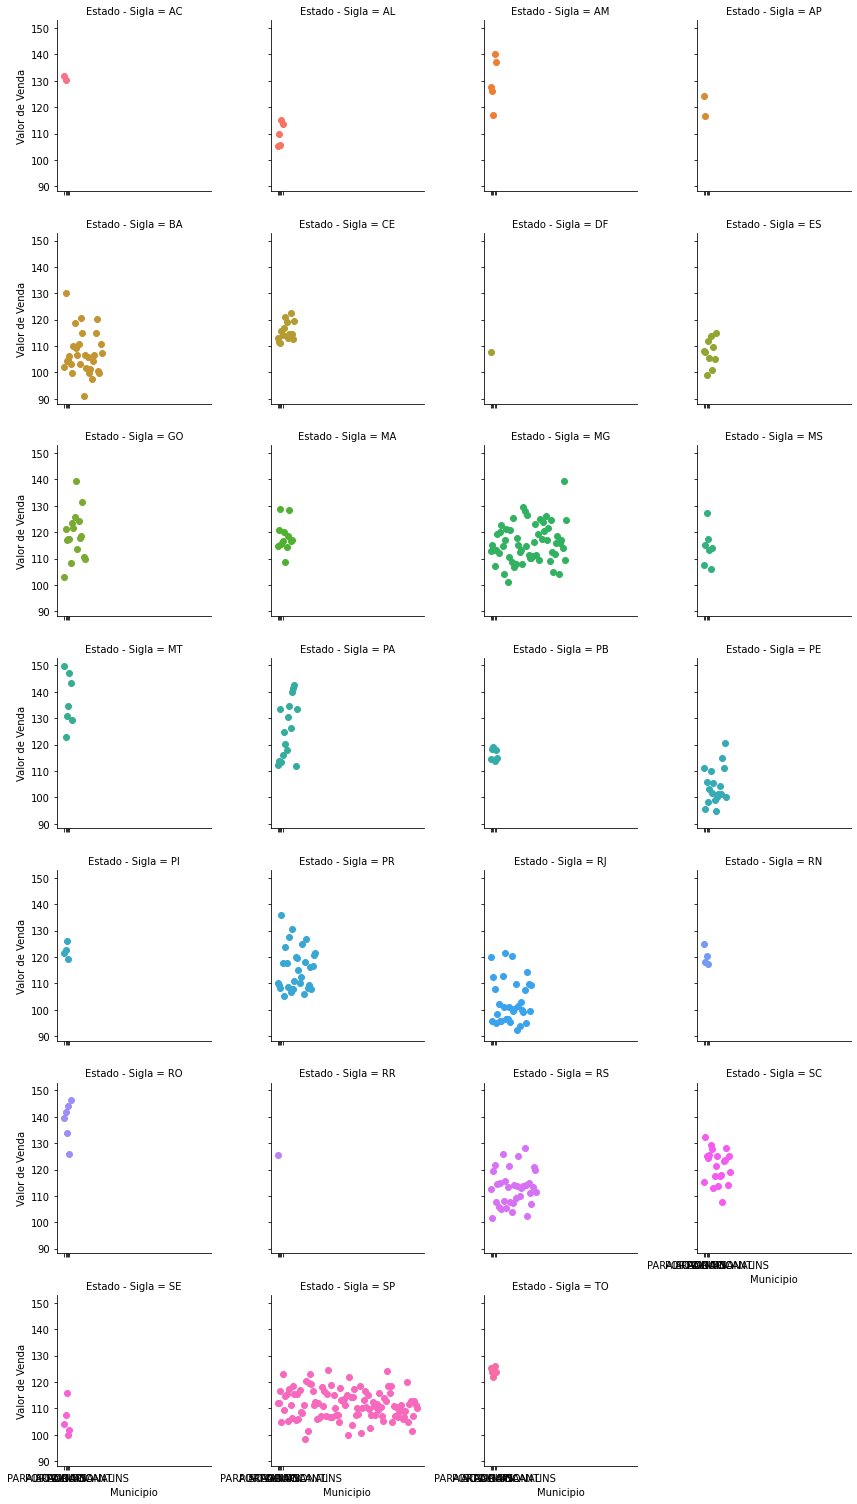

In [133]:
#COR
fundao = '#f5f5f5'

#arrumando a grid
grid_agrupada = sns.FacetGrid(dadosagrupados, col='Estado - Sigla', hue='Estado - Sigla', col_wrap=4)

#informações do tipo de gráfico
grid_agrupada = grid_agrupada.map(plt.scatter, 'Municipio', 'Valor de Venda')

In [137]:
dados.corr('pearson')

,Valor de Venda,Valor de Compra
Valor de Venda,1.0,NaN
Valor de Compra,NaN,NaN


In [138]:
dadosagrupados.head()

,Estado - Sigla,Municipio,Valor de Venda
0,AC,CRUZEIRO DO SUL,132.000000
1,AC,RIO BRANCO,130.357615
2,AL,ARAPIRACA,105.299545
3,AL,DELMIRO GOUVEIA,110.000000
4,AL,MACEIO,105.704545


In [143]:
campao['Bairro'].nunique()

68

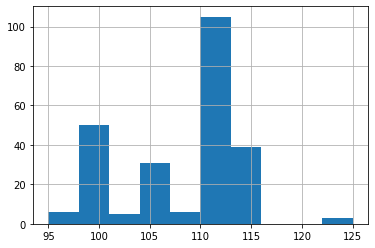

In [148]:
campao['Valor de Venda'].hist(bins=10)

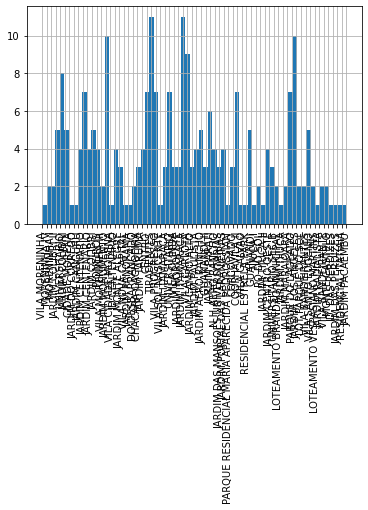

In [152]:
campao['Bairro'].hist(bins=68)
plt.xticks(rotation=90);

In [153]:
campao['Bairro'].value_counts()

TIRADENTES            11
JARDIM ITAMARACA      11
JARDIM LOS ANGELES    10
JARDIM MONUMENTO      10
VILA CARLOTA           9
                      ..
VILA NOVA CAPITAL      1
VILA CIDADE MORENA     1
JARDIM DO CORREGO      1
CIDADE MORENA          1
JARDIM PACAEMBU        1
Name: Bairro, Length: 68, dtype: int64

In [159]:
agrupandoms = dados.loc[dados['Estado - Sigla'] == 'MS']
agrupandoms

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
154,CO,MS,PONTA PORA,CRESPO & PALADINI GAS E TRANSPORTES LTDA,02.965.310/0001-76,RUA ANTONIO JOAO,1268,NaN,CENTRO,79904-594,GLP,02/06/2022,108.00,NaN,R$ / 13 kg,ULTRAGAZ
156,CO,MS,CORUMBA,FARID A. H. M. MUSTAFÁ EPP,02.984.590/0001-60,RUA CAMPO GRANDE,S/N,LOTE 69,N. SRA. DE FATIMA,79320-080,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,SUPERGASBRAS ENERGIA
236,CO,MS,CAMPO GRANDE,A.S. FERREIRA - ME,33.107.319/0001-70,RUA ANACA,517,NaN,VILA MORENINHA,79065-070,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,BRANCA
240,CO,MS,CORUMBA,PANTANEIRA REVENDEDORA. DE GÁS E TRANSPORTE LT...,36.788.156/0001-26,RUA PORTO CARRERO,1939,NaN,AEROPORTO,79332-090,GLP,01/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
328,CO,MS,PONTA PORA,UNIGAS COMERCIO DE COMBUSTIVEIS LTDA,03.537.946/0002-60,AVENIDA BRASIL,3549,NaN,CENTRO,79900-000,GLP,02/06/2022,106.00,NaN,R$ / 13 kg,COPAGAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17945,CO,MS,DOURADOS,JESSICA VARGAS MORALES,23.858.594/0001-71,RUA ALVARO BRANDAO,1670,NaN,VILA SAO FRANCISCO,79833-260,GLP,27/06/2022,120.00,NaN,R$ / 13 kg,COPAGAZ
17948,CO,MS,DOURADOS,AUTO POSTO ANIELLI LTDA,03.084.756/0001-54,AVENIDA MARCELINO PIRES,7250,NaN,JARDIM MARCIA,79841-000,GLP,27/06/2022,115.00,NaN,R$ / 13 kg,COPAGAZ
18012,CO,MS,CAMPO GRANDE,SUPERMERCADO GAUCHAO LTDA,35.831.943/0001-40,RUA PADRE MUSA TUMA,1121,NaN,JARDIM ITAMARACA,79062-130,GLP,29/06/2022,114.99,NaN,R$ / 13 kg,BRANCA
18027,CO,MS,CAMPO GRANDE,JULIANO ARAUJO PEREIRA EIRELI,36.160.092/0001-14,RUA ENGENHEIRO PAULO FRONTIN,501,NaN,JARDIM LOS ANGELES,79073-235,GLP,30/06/2022,110.00,NaN,R$ / 13 kg,BRANCA


In [165]:
agrupandoms['Municipio'].nunique()

7

In [166]:
agrupandoms['Municipio'].unique()

array(['PONTA PORA', 'CORUMBA', 'CAMPO GRANDE', 'TRES LAGOAS', 'COXIM',
       'DOURADOS', 'NOVA ANDRADINA'], dtype=object)

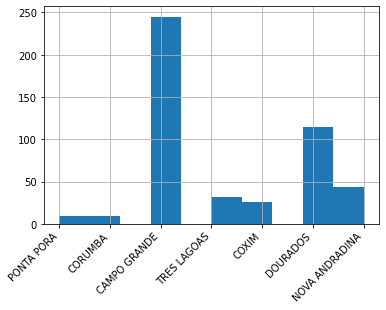

In [173]:
agrupandoms['Municipio'].hist()
plt.xticks(rotation=45, ha='right');

In [174]:
agrupandoms.describe()

,Valor de Venda,Valor de Compra
count,480.000000,0.0
mean,112.133208,NaN
std,7.742917,NaN
min,95.000000,NaN
25%,110.000000,NaN
50%,110.000000,NaN
75%,115.000000,NaN
max,130.000000,NaN
